In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# useful webs:
# latex font: https://texblog.org/2012/08/29/changing-the-font-size-in-latex/
# plot marker: https://stackoverflow.com/questions/8409095/matplotlib-set-markers-for-individual-points-on-a-line
# LaTeX for Jupyther: https://www.mathjax.org/

In [3]:
# import datasets
# One Variable
ex1data1 = pd.read_csv("ex1data1.txt", header=None, names=['cityPopulation', 'foodTruckProfit'])
# Multiple Variables
ex1data2 = pd.read_csv("ex1data2.txt", header=None)
ex1data1.head()

,cityPopulation,foodTruckProfit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
ex1data1.describe()

,cityPopulation,foodTruckProfit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
ex1data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
cityPopulation     97 non-null float64
foodTruckProfit    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [6]:
ex1data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


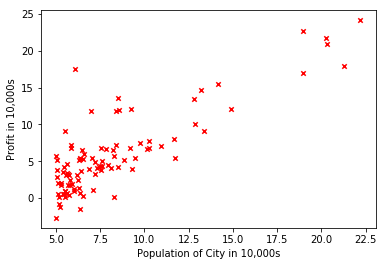

In [7]:
# Starting with only one variable
ex1data1.plot(kind='scatter', x='cityPopulation', y='foodTruckProfit', marker='x', color='r')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.show()

In [8]:
print(np.corrcoef(ex1data1.cityPopulation, ex1data1.foodTruckProfit))
# shows good correlation (more population, more people buy food -> more profit)

[[1.         0.83787323]
 [0.83787323 1.        ]]


In [9]:
# Create variables X and y
#X = np.array(ex1data1.iloc[:,0])
#y = np.array(ex1data1.iloc[:,1])
#m = len(y)

### Objective of Linear Regression: minimize the Cost Function
\begin{equation*}
\Large
J(\theta) = \frac{1}{2m} \sum_{n=1}^m \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2
\end{equation*}

### Hypothesis for the linear model
\begin{equation*}
\Large
h_\theta (x) = \theta^Tx = \theta_0 + \theta_1x_1
\end{equation*}

### Gradient Descent
\begin{equation*}
\Large
\theta_j := \theta_j - \alpha\frac{1}{m} \sum_{n=1}^m \left( h_\theta (x^{(i)}) - y^{(i)} \right)x_j^{(i)}
\end{equation*}

In [10]:
theta = np.array([[0],[0]])
iterations = 1500
alpha = 0.01

In [11]:
ex1_n=ex1data1.values
m=len(ex1_n[:,1])
X=np.append(np.ones((m,1)), ex1_n[:,0].reshape(m,1), axis=1)
y=ex1_n[:,1].reshape(m,1)
theta=np.zeros((2,1))
print(theta)

[[0.]
 [0.]]


In [12]:
# define the cost function
def computeCost(X, y, theta):
    m = len(y)
    J = 0
    h = X.dot(theta)
    sq_er = (h-y)**2
    J = 1/(2*m) * np.sum(sq_er)
    return J

In [13]:
# define the Gradient Descent
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    
    for i in range(num_iters):
        h = X.dot(theta)
        error = np.dot(X.transpose(),(h - y))
        descent = alpha * 1/m * error
        theta -= descent
        J_history.append(computeCost(X,y,theta))
    return theta, J_history

In [14]:
computeCost(X,y,theta)

32.072733877455676

In [15]:
computeCost(X,y,np.array([[-1],[2]]))

54.24245508201238

In [16]:
# Running Gradient Descent
theta,J_history = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [17]:
predict1 = np.dot(theta.transpose(),np.array([1,3.5]))
predict1[0]*10000

4519.7678677017675

In [18]:
predict2 = np.dot(theta.transpose(), np.array([1,7]))
predict2[0]*10000

45342.45012944714

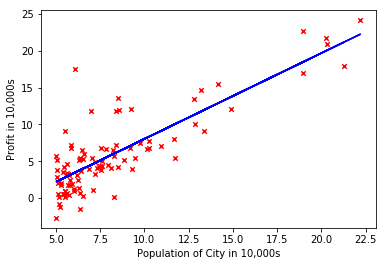

In [19]:
# Plot the fitted line after theta vector
f = lambda x: theta[0] + theta[1]*x
x = np.array(ex1data1['cityPopulation'])
y = [f(i) for i in x]
ex1data1.plot(kind='scatter', x='cityPopulation', y='foodTruckProfit', marker='x', color='r')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.plot(x, y, c="blue")
plt.show()

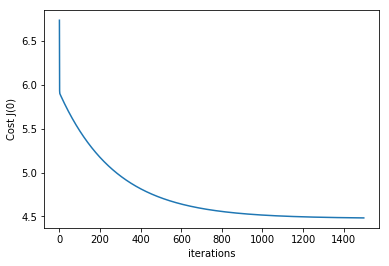

In [20]:
# Plot cost vs iterations
# Seems good as it decreases with iterations
plt.plot(np.arange(iterations),J_history)
plt.xlabel("iterations")
plt.ylabel("Cost J(0)")
plt.show()

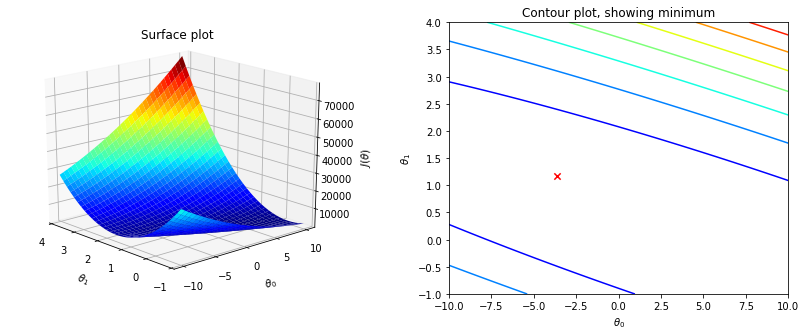

In [21]:
# Generate Surface plot
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i,j] = computeCost(X,y,t)
#J_vals = J_vals.transpose()

fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)

# Surface plot:
ax1.set_title('Surface plot')
ax1.plot_surface(theta1, theta0, J_vals.T, cmap='jet', rstride=3, cstride=3, antialiased=True)
ax1.view_init(elev=20, azim=318)
ax1.set_xlabel(r'$\theta_1$', labelpad=8)
ax1.set_xlim(4,-1)
ax1.set_ylabel(r'$\theta_0$', labelpad=8)
ax1.set_yticks(np.linspace(-10, 10, 5))
ax1.set_zlabel(r'$J(\theta)$', labelpad=8);

# Contour plot:
ax2.set_title('Contour plot, showing minimum')
#ax2.contour(theta0, theta1, J_vals.T, np.logspace(-2, 3, 20),  cmap='jet')
ax2.contour(theta0, theta1, J_vals.T, cmap='jet')
ax2.scatter(theta[0], theta[1], marker='x', color='r', s=40)
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_yticks(np.arange(-1,4.5,0.5));

## Linear regression with multiple variables

### Feature Normalization

In [22]:
# Change column names
ex1data2.columns = ['size', 'bedrooms', 'price']
ex1data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [60]:
# Calculate mean for every column
meanSize = ex1data2['size'].mean()
meanBedr = ex1data2['bedrooms'].mean()
meanPrice = ex1data2['price'].mean()
# Normalize with apply()
def norm(x):
    return (x - x.mean())/x.std()
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [85]:
alpham = 0.01
num_itersm = 400
ex2_n=ex1data2.values
mm = len(ex2_n[:,-1])
Xm = ex2_n[:,0:2].reshape(mm, 2)
Xm, mu, sigma = featureNormalization(Xm)
Xm = np.c_[np.ones((mm,1)), Xm]
ym = ex2_n[:,-1].reshape(mm,1)
thetam = np.zeros((3,1))
computeCost(Xm,ym,thetam)
thetam, J_historym = gradientDescent(Xm, ym, thetam, alpham, num_itersm)
print(thetam)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


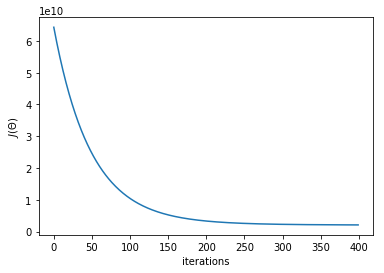

In [94]:
#plt.plot(np.arange(num_itersm),J_historym)
plt.plot(J_historym)
plt.xlabel("iterations")
plt.ylabel("$J(\Theta)$")
plt.show()